<a href="https://colab.research.google.com/github/aizazaziz/ML_Projects/blob/main/Product_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load Excel file
df = pd.read_excel(
    "AdvancedDataset.xlsx",
    sheet_name="Business_Analytics"
)

df.head()


,Date,Region,Product,Revenue,Cost,Customer_Type,Target
0,2022-01-01,Dammam,A,45565,38011,Corporate,44693
1,2022-01-02,NEOM,A,24283,5589,Retail,25457
2,2022-01-03,Riyadh,C,5934,12749,Corporate,34017
3,2022-01-04,Dammam,A,39754,25683,Retail,35654
4,2022-01-05,Dammam,A,26380,7501,Corporate,11976


In [3]:
# Convert Date
df['Date'] = pd.to_datetime(df['Date'])

# Time features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Profit
df['Profit'] = df['Revenue'] - df['Cost']

df.head()


,Date,Region,Product,Revenue,Cost,Customer_Type,Target,Month,Year,Profit
0,2022-01-01,Dammam,A,45565,38011,Corporate,44693,1,2022,7554
1,2022-01-02,NEOM,A,24283,5589,Retail,25457,1,2022,18694
2,2022-01-03,Riyadh,C,5934,12749,Corporate,34017,1,2022,-6815
3,2022-01-04,Dammam,A,39754,25683,Retail,35654,1,2022,14071
4,2022-01-05,Dammam,A,26380,7501,Corporate,11976,1,2022,18879


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Region_enc'] = le.fit_transform(df['Region'])
df['Product_enc'] = le.fit_transform(df['Product'])
df['Customer_enc'] = le.fit_transform(df['Customer_Type'])


In [5]:
X = df[['Region_enc', 'Product_enc', 'Customer_enc', 'Cost', 'Month']]
y = df['Revenue']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Linear Regression MAE:", mean_absolute_error(y_test, lr_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))

print("Random Forest R2:", r2_score(y_test, rf_pred))


Linear Regression MAE: 11070.535633643087
Random Forest MAE: 11112.0703311856
Random Forest R2: -0.010138913422095053


In [10]:
product_sales = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
product_sales


,Revenue
Product,
D,83552750
A,82355790
B,80869035
C,80464167


In [11]:
df['Predicted_Revenue'] = rf.predict(X)

predicted_product_sales = (
    df.groupby('Product')['Predicted_Revenue']
    .sum()
    .sort_values(ascending=False)
)

predicted_product_sales


,Predicted_Revenue
Product,
D,8.308575e+07
A,8.222079e+07
C,8.084381e+07
B,8.081818e+07


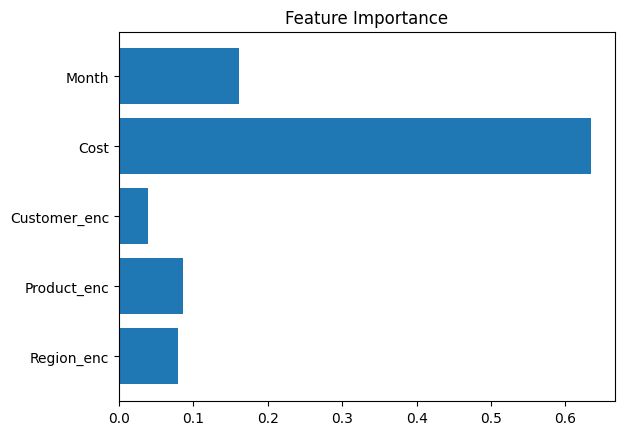

In [12]:
import matplotlib.pyplot as plt

importance = rf.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.title("Feature Importance")
plt.show()


In [13]:
df[['Date','Region','Product','Revenue','Predicted_Revenue']] \
  .to_csv("Business_ML_Predictions.csv", index=False)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
sns.set(style="whitegrid")


In [15]:
df = pd.read_csv("Business_ML_Predictions.csv")
df.head()


,Date,Region,Product,Revenue,Predicted_Revenue
0,2022-01-01,Dammam,A,45565,26756.150868
1,2022-01-02,NEOM,A,24283,26004.335050
2,2022-01-03,Riyadh,C,5934,24599.513846
3,2022-01-04,Dammam,A,39754,26110.676879
4,2022-01-05,Dammam,A,26380,28249.024374


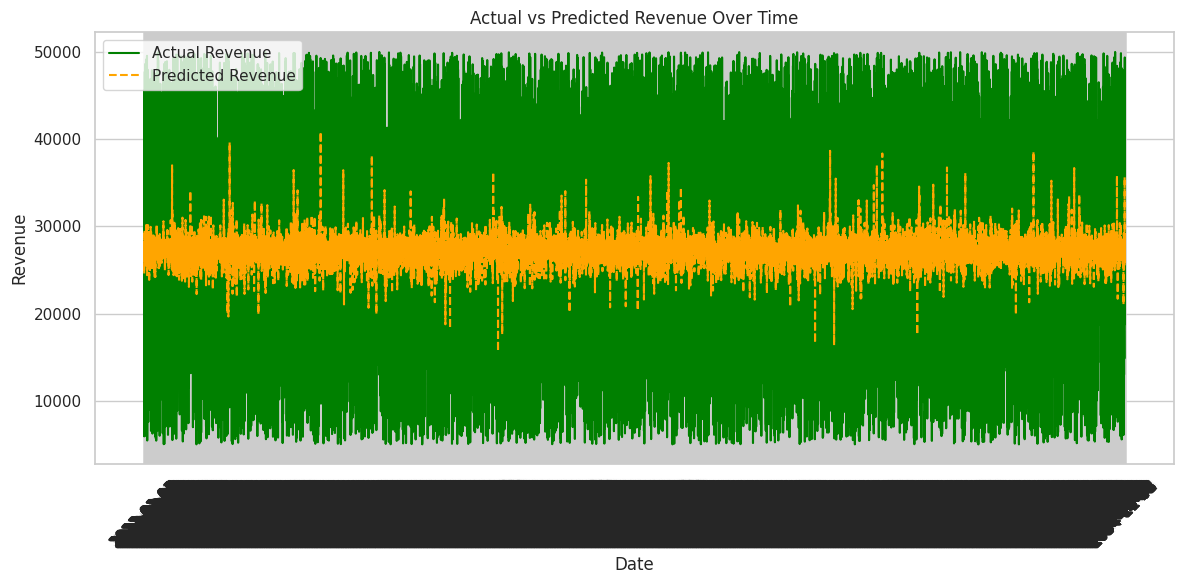

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Revenue'], label='Actual Revenue', color='green')
plt.plot(df['Date'], df['Predicted_Revenue'], label='Predicted Revenue', color='orange', linestyle='--')
plt.title('Actual vs Predicted Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-409857360.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_pred.index, y=product_pred.values, palette='viridis')


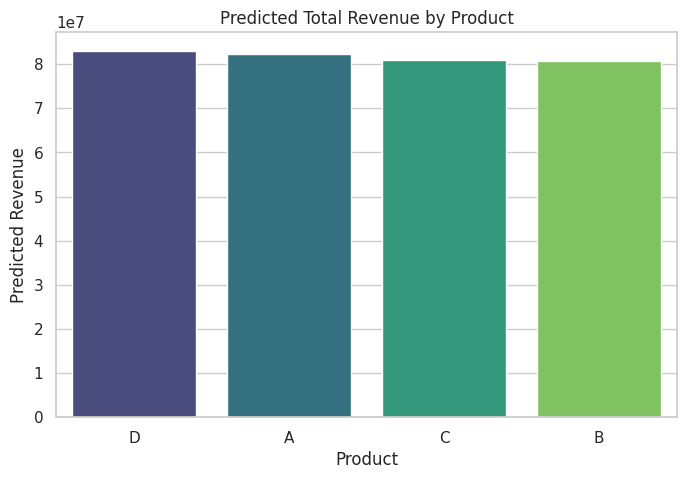

In [17]:
product_pred = df.groupby('Product')['Predicted_Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=product_pred.index, y=product_pred.values, palette='viridis')
plt.title('Predicted Total Revenue by Product')
plt.ylabel('Predicted Revenue')
plt.xlabel('Product')
plt.show()


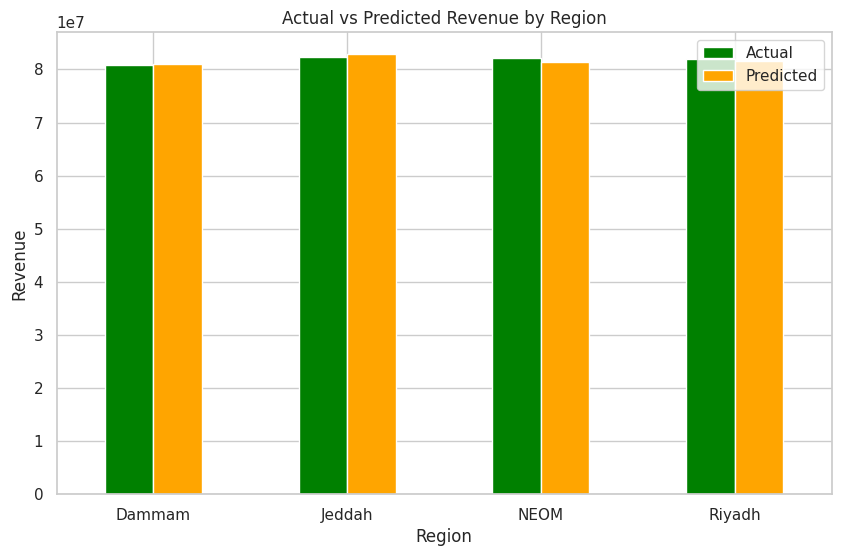

In [18]:
region_summary = df.groupby('Region')[['Revenue','Predicted_Revenue']].sum()

region_summary.plot(kind='bar', figsize=(10,6), color=['green','orange'])
plt.title('Actual vs Predicted Revenue by Region')
plt.ylabel('Revenue')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend(['Actual','Predicted'])
plt.show()


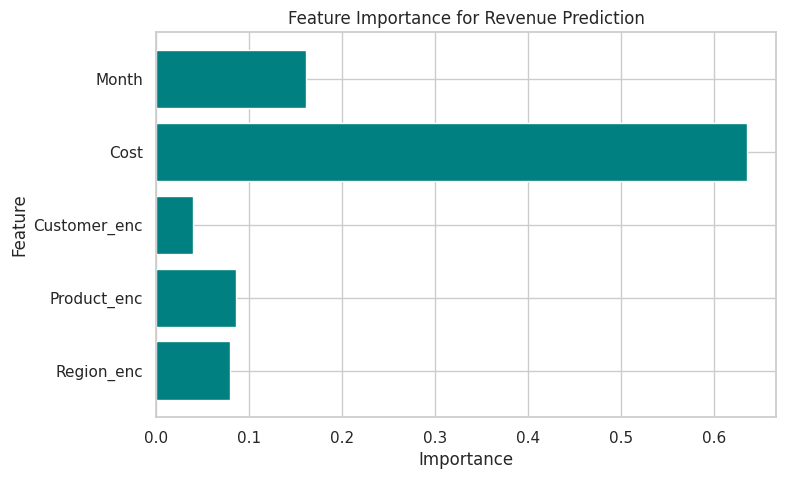

In [19]:
import numpy as np

# Example feature importances (from previous RF model)
importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importance, color='teal')
plt.title("Feature Importance for Revenue Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


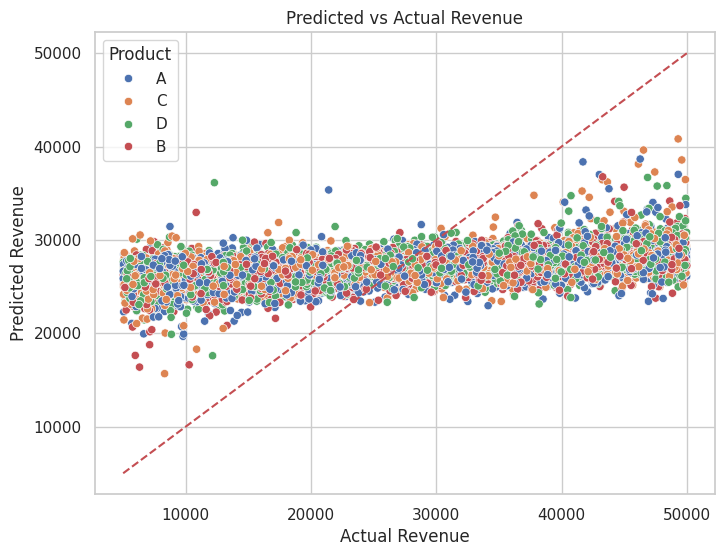

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Revenue'], y=df['Predicted_Revenue'], hue=df['Product'])
plt.plot([df['Revenue'].min(), df['Revenue'].max()],
         [df['Revenue'].min(), df['Revenue'].max()], 'r--')
plt.title('Predicted vs Actual Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()


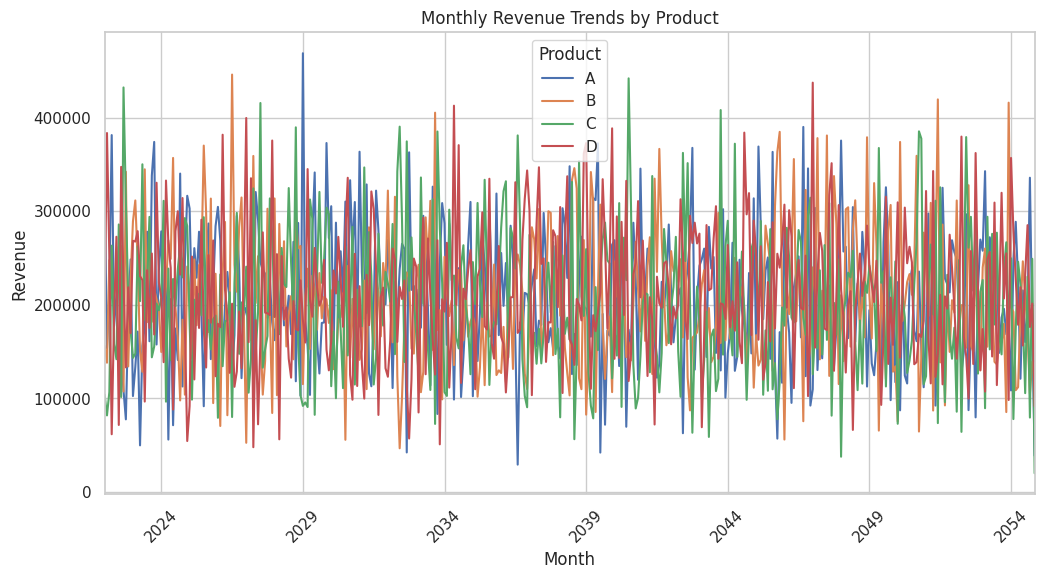

In [21]:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
monthly_product = df.groupby(['Month','Product'])['Revenue'].sum().unstack()

monthly_product.plot(figsize=(12,6))
plt.title('Monthly Revenue Trends by Product')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()
